# Проектная работа  "Отток клиентов"

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Цель-работы" data-toc-modified-id="Цель-работы-1">Цель работы</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2">Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-2.1">Вывод:</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-3">Исследование задачи</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Дерево-решений-DecisionTreeClassifier" data-toc-modified-id="Дерево-решений-DecisionTreeClassifier-3.0.1">Дерево решений DecisionTreeClassifier</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-3.0.2">Логистическая регрессия</a></span></li><li><span><a href="#Случайный-лес-RandomForestClassifier" data-toc-modified-id="Случайный-лес-RandomForestClassifier-3.0.3">Случайный лес RandomForestClassifier</a></span></li></ul></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-3.1">Вывод:</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-4">Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений-DecisionTreeClassifier" data-toc-modified-id="Дерево-решений-DecisionTreeClassifier-4.1">Дерево решений DecisionTreeClassifier</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-4.2">Логистическая регрессия</a></span></li><li><span><a href="#Случайный-лес-RandomForestClassifier" data-toc-modified-id="Случайный-лес-RandomForestClassifier-4.3">Случайный лес RandomForestClassifier</a></span></li><li><span><a href="#Устранение-дисбаланса-с-помощью-уменьшения-выборки" data-toc-modified-id="Устранение-дисбаланса-с-помощью-уменьшения-выборки-4.4">Устранение дисбаланса с помощью уменьшения выборки</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений-DecisionTreeClassifier" data-toc-modified-id="Дерево-решений-DecisionTreeClassifier-4.4.1">Дерево решений DecisionTreeClassifier</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-4.4.2">Логистическая регрессия</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-4.4.3">Случайный лес</a></span></li></ul></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-4.5">Вывод:</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-5">Тестирование модели</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-6">Вывод:</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-7">Чек-лист готовности проекта</a></span></li></ul></div>

## Цель работы

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет на основании исторических данных.
F1 нужно довести  до 0.59.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [2]:
!pip install PrettyTable
# импорт основных библиотек
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler 
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings("ignore")
import pickle
from sklearn.externals.joblib import dump
from sklearn.externals.joblib import load
from pandas import Series
from prettytable import PrettyTable

#функции
'''
устранение дисбаланса с помощью техники upsampling
'''
def upsample(features, target, repeat):    
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled=shuffle(features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

'''
устранение дисбаланса с помощью техники downsampling
'''

def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)    
    return features_downsampled, target_downsampled

# построение ROC-кривых
'''
рисует 2 кривые: 1я - для модели до подбора гиперпараметров
                 2я- для модели после подбора гиперпараметров
'''


def ROCCURVE_paint_Comp(model, ideal_model, features, target):
    
    probabilities_valid = ideal_model.predict_proba(features)
    probabilities_one_valid = probabilities_valid[:, 1]
    fpr, tpr, thresholds = roc_curve(target, probabilities_one_valid)
    
    probabilities_valid0 = model.predict_proba(features)
    probabilities_one_valid0 = probabilities_valid0[:, 1]
    fpr0, tpr0, thresholds0 = roc_curve(target, probabilities_one_valid0)
    
    plt.figure()
  
    plt.plot(fpr, tpr, label='Улучшенная модель')
    
    plt.plot(fpr0, tpr0,linestyle=':',label='Обычная модель')
   
    plt.legend()
    
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC-кривая")
    plt.show()
#-----------------------------------------------------------------------------------------------------------------------------
'''
рисует ROC кривую для заданной модели
'''

def ROCCURVE_paint_Standart(model, features, target):
    
    probabilities_valid = model.predict_proba(features)
    probabilities_one_valid = probabilities_valid[:, 1]
    fpr, tpr, thresholds = roc_curve(target, probabilities_one_valid)     
    
    plt.figure()
    
    plt.plot(fpr, tpr)
    
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC-кривая")
    plt.show()
    
#-----------------------------------------------------------------------------------------------------------------------------
'''
функции подбора гиперпараметров

для экономии времени работы начальные параметры задавались на основе результатов прошлых экспериментов

'''

def FindIdealRandomForest(model0, f1_0, features_train, target_train,features_valid, target_valid,weight):
    
    ideal_model=model0
    f1=f1_0

    for ideal_depth in range(5,30,1):
        for ideal_est in range(110,130,1):
            model=RandomForestClassifier(random_state=12345, max_depth=ideal_depth, n_estimators=ideal_est,class_weight=weight)
            model.fit(features_train, target_train)
            f1=f1_score(target_valid,model.predict(features_valid))
            if (f1>f1_0):
                ideal_model=model
                f1_0=f1
    return ideal_model

#------------------------------------------------------------------------------------------------------------------------------
def FindIdealDecisionTree(model0, f1_0,features_train, target_train,features_valid, target_valid, weight):
    
    ideal_model=model0
    f1=f1_0

    for ideal_depth in range(5,25,1):
        for ideal_msl in range(10,40,1):
            model=DecisionTreeClassifier(random_state=12345, max_depth=ideal_depth,min_samples_leaf=ideal_msl, class_weight=weight)
            model.fit(features_train, target_train)
            f1=f1_score(target_valid,model.predict(features_valid))
            if (f1>f1_0):
                ideal_model=model
                f1_0=f1
    return ideal_model

Defaulting to user installation because normal site-packages is not writeable


Создадим DataFrame  churn  и загрузим в него данные из файла Churn_Modelling.csv.

In [3]:
churn=pd.read_csv('/datasets/Churn.csv', sep=',')
print('Размеры таблицы:', churn.shape)

Размеры таблицы: (10000, 14)


Выведем первые 10 строк таблицы:

In [4]:
churn.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


Выведем основную информацию:

In [5]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Наша таблица содержит следующую информацию:

•	RowNumber — индекс строки в данных

•	CustomerId — уникальный идентификатор клиента

•	Surname — фамилия

•	CreditScore — кредитный рейтинг

•	Geography — страна проживания

•	Gender — пол

•	Age — возраст

•	Tenure — сколько лет человек является клиентом банка

•	Balance — баланс на счёте

•	NumOfProducts — количество продуктов банка, используемых клиентом

•	HasCrCard — наличие кредитной карты

•	IsActiveMember — активность клиента

•	EstimatedSalary — предполагаемая зарплата

•	Exited — факт ухода клиента

В поле Tenure (сколько лет человек является клиентом банка) есть пропуски, заполним их 0.


In [6]:
churn=churn.fillna(0)

Поля Surname и CustomerId не являются важными признаками при прогнозе поведения клиента, поэтому их в переменную с признаками не включаем. Поля Gender и Geography преобразуем с помощью техник OHE (Gender) и порядкового кодирования(Geography). Новый data frame назовем churn_upd.

In [7]:
# скопируем исходный data frame  в новый
churn_upd=churn.copy()

# удалим столбцы с фамилией и ID
churn_upd=churn_upd.drop(['CustomerId','Surname', 'RowNumber'],1)

# техникой OHE преобразуем столбец Gender

churn_upd=pd.get_dummies(data=churn_upd, columns=['Gender'], drop_first=True)

# прямым кодированием преобразуем столбец Geography 

encoder=OrdinalEncoder()

encoder.fit(churn_upd[['Geography']])

churn_upd['Geography']=pd.DataFrame(encoder.transform(churn_upd[['Geography']]))

churn_upd.head(5)


,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male
0,619,0.0,42,2.0,0.00,1,1,1,101348.88,1,0
1,608,2.0,41,1.0,83807.86,1,0,1,112542.58,0,0
2,502,0.0,42,8.0,159660.80,3,1,0,113931.57,1,0
3,699,0.0,39,1.0,0.00,2,0,0,93826.63,0,0
4,850,2.0,43,2.0,125510.82,1,1,1,79084.10,0,0


Создадим переменные с целевым и категориальными признаками, затем разделим наши выборки на обучающую и валидационную:

In [8]:
features=churn_upd.drop('Exited', axis=1)
target=churn_upd['Exited']


Масштабируем признаки:

In [9]:
pd.options.mode.chained_assignment = None

scaler = StandardScaler()

scaler.fit(features)

features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)


Создадим константную модель для проверки наших моделей:

In [10]:
model_1=pd.Series(0, index=target_valid.index)

### Вывод:
На данном этапе мы загрузили файл с данными о поведении клиентов. В нашем распоряжении 10000 записей с данными о зарплате, банковском балансе, возрасте, активности и т.п. В поле Tenure  есть 909 пропусков, их заполнять не будем, оставим их для будущей модели. Данные о фамилии и ID клиента нам для обучения не нужны, поэтому от них можно избавится, а данные о поле и стране проживания были преобразованы в числовые. После всех преобразований данные были масштабированы, это поможет избежать ситуации, когда большим числовым значениям придается больший вес при вычислениях.

## Исследование задачи

В данной задаче нам нужно понять, уйдет ли клиент из банка в ближайшее время или нет. Это задача бинарной классификации(предсказать 0 или 1), соответвенно модели также будут использоваться для классификации: дерево решений, случайный лес и логистическая регрессия.
Проверим как соотносятся между собой число ушедших и число оставшихся клиентов.

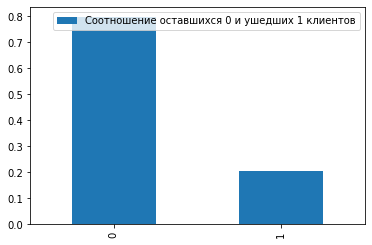

In [11]:
exit_frequency=churn['Exited'].value_counts(normalize=True)
exit_frequency.plot(kind='bar', label='Соотношение оставшихся 0 и ушедших 1 клиентов', legend=True)

Заметно, что число оставшихся клиентов выше, чем число ушедших в 4 раза.

Построим модели для предсказаний оттока без учета дисбаланса классов.

#### Дерево решений DecisionTreeClassifier

Построим дерево решений

In [12]:
DTreeModel=DecisionTreeClassifier(random_state=12345, class_weight=None)
DTreeModel.fit(features_train, target_train)
prediction=DTreeModel.predict(features_valid)

print('Точность accuracy дерева решений:',accuracy_score(target_valid, prediction))
print('Точность дерева решений:',precision_score(target_valid, prediction))
print('Полнота дерева решений:',recall_score(target_valid, prediction))
print('F1 дерева решений:',f1_score(target_valid, prediction))

Точность accuracy дерева решений: 0.768
Точность дерева решений: 0.4584103512014787
Полнота дерева решений: 0.4635514018691589
F1 дерева решений: 0.46096654275092935


Попробуем улучшить показатель F1 с помощью подбора гиперпараметров:

In [13]:
IdealTree=FindIdealDecisionTree(DTreeModel,f1_score(target_valid, prediction),features_train, target_train,features_valid, target_valid,None)

Результаты после подбора гиперпараметров:

In [14]:
print('Точность accuracy идеального дерева решений:',accuracy_score(target_valid, IdealTree.predict(features_valid)))

print('Точность идеального дерева решений:',precision_score(target_valid, IdealTree.predict(features_valid)))
print('Полнота идеального дерева решений:',recall_score(target_valid, IdealTree.predict(features_valid)))
print('F1 идеального дерева решений:',f1_score(target_valid, IdealTree.predict(features_valid)))

print('Параметры идеального дерева решений:')
print('Глубина:',IdealTree.max_depth)
print('Количество листьев:',IdealTree.min_samples_leaf)


Точность accuracy идеального дерева решений: 0.8504
Точность идеального дерева решений: 0.7280453257790368
Полнота идеального дерева решений: 0.4803738317757009
F1 идеального дерева решений: 0.5788288288288288
Параметры идеального дерева решений:
Глубина: 11
Количество листьев: 31


Построим ROC кривую для дерева решений:

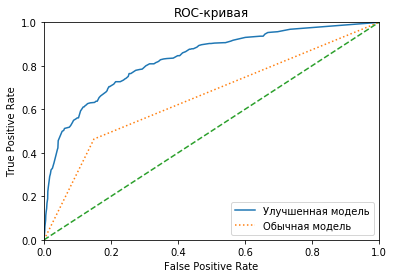

In [15]:
probabilities_valid = IdealTree.predict_proba(features_valid)
ROCCURVE_paint_Comp(DTreeModel,IdealTree, features_valid, target_valid)

In [16]:
auc_roc=roc_auc_score(target_valid, probabilities_valid[:, 1])
print('Площадь под кривой для идеальной модели:',auc_roc)

Площадь под кривой для идеальной модели: 0.831575943497182


Проверим нашу модель на константной модели:

In [17]:
adq_check=accuracy_score(model_1,IdealTree.predict(features_valid))
print(adq_check)

0.8588


#### Логистическая регрессия

Проверим какую точность покажет модель логистической регрессии.

In [18]:
LRModel=LogisticRegression(random_state=12345, solver='liblinear',class_weight=None)
LRModel.fit(features_train, target_train)
prediction=LRModel.predict(features_valid)
accuracy=accuracy_score(prediction,target_valid)
print('Точность логистической регрессии:', round(accuracy,3))

Точность логистической регрессии: 0.782


Найдем полноту, точность и метрику F1:

In [19]:
print('Точность логистической регресии:',precision_score(target_valid, prediction))
print('Полнота логистической регрессии:',recall_score(target_valid, prediction))
print('F1 логистической регрессии:',f1_score(target_valid, prediction))

Точность логистической регресии: 0.4383561643835616
Полнота логистической регрессии: 0.059813084112149535
F1 логистической регрессии: 0.10526315789473685


Построим ROC кривую для логистической регрессии:

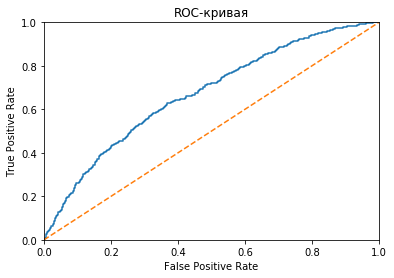

Площадь под кривой для логистической регрессии: 0.6711336234572305


In [20]:
probabilities_valid = LRModel.predict_proba(features_valid)
ROCCURVE_paint_Standart(LRModel, features_valid, target_valid)
auc_roc=roc_auc_score(target_valid, probabilities_valid[:, 1])
print('Площадь под кривой для логистической регрессии:',auc_roc) 

Проверим нашу модели на адекватность на константной модели:

In [21]:
adq_check=accuracy_score(model_1,LRModel.predict(features_valid))
print(adq_check)

0.9708


#### Случайный лес RandomForestClassifier

Проверим какую точность покажет случайный лес:

In [22]:
RandomForestModel=RandomForestClassifier(random_state=12345, n_estimators=100, class_weight=None)
RandomForestModel.fit(features_train, target_train)
prediction=RandomForestModel.predict(features_valid)
accuracy=accuracy_score(prediction,target_valid)
print('Точность accuracy случайного леса:', round(accuracy,3))
print('Точность cлучайного леса:',precision_score(target_valid, prediction))
print('Полнота cлучайного леса:',recall_score(target_valid, prediction))
print('F1 cлучайного леса:',f1_score(target_valid, prediction))


Точность accuracy случайного леса: 0.851
Точность cлучайного леса: 0.7587301587301587
Полнота cлучайного леса: 0.44672897196261685
F1 cлучайного леса: 0.5623529411764706


попробуем улучшить качество модели с помощью подбора гиперпараметров:

In [23]:
IdealForest=FindIdealRandomForest(RandomForestModel, f1_score(target_valid, prediction), features_train, target_train,features_valid, target_valid,None)

print('Параметры идеального леса:')
print('Глубина:',IdealForest.max_depth)
print('Количество деревьев:',IdealForest.n_estimators)

prediction=IdealForest.predict(features_valid)
accuracy=accuracy_score(prediction,target_valid)

print('Точность accuracy случайного леса:', round(accuracy,3))
print('Точность cлучайного леса:',precision_score(target_valid, prediction))
print('Полнота cлучайного леса:',recall_score(target_valid, prediction))
print('F1 cлучайного леса:',f1_score(target_valid, prediction))


Параметры идеального леса:
Глубина: 23
Количество деревьев: 113
Точность accuracy случайного леса: 0.857
Точность cлучайного леса: 0.7774294670846394
Полнота cлучайного леса: 0.4635514018691589
F1 cлучайного леса: 0.5807962529274006


Построим ROC кривую для идеальной и обычной моделей и найдем площадь под ней:

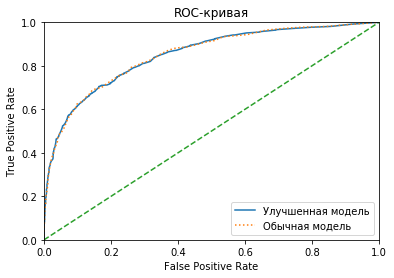

Площадь под кривой для случайного леса: 0.8506313761860598


In [24]:

ROCCURVE_paint_Comp(RandomForestModel,IdealForest, features_valid, target_valid)

probabilities_valid = IdealForest.predict_proba(features_valid)
auc_roc=roc_auc_score(target_valid, probabilities_valid[:, 1])


print('Площадь под кривой для случайного леса:',auc_roc)


Проверим на константной модели:

In [25]:
adq_check=accuracy_score(model_1,IdealForest.predict(features_valid))
print(adq_check)

0.8724


### Вывод:
На несбалансированной выборке дерево решений и случайный лес показали высокий коэффициент accuracy, который ранее являлся оценкой качества модели. После подбора гиперпараметров удалось улучшить показатели алгоритмов.Однако, при проверке на адекватность(предсказать одни 0) показатель accuracy у всех моделей оказался выше, чем при проверке на валидационной выборке. можно сделать вывод, что пока ни одна из моделей не является рабочей.


## Борьба с дисбалансом

Отрицательных классов в нашей выборке 80%, сбалансируем выборку с помощью техники upsampling, чтобы достигнуть соотношения 1:1 и проверим как меняются результы работы наших моделей.

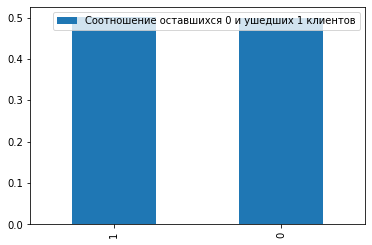

In [26]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)
exit_frequency=target_upsampled.value_counts(normalize=True)
exit_frequency.plot(kind='bar', label='Соотношение оставшихся 0 и ушедших 1 клиентов', legend=True)


Переобучим наши модели на сбалансированной с помощью upsampling техники выборке и посмотрим, какая из моделей покажет лучшие результаты:

### Дерево решений DecisionTreeClassifier

In [27]:
IdealTree.fit(features_upsampled, target_upsampled)
prediction=IdealTree.predict(features_valid)
                            
print('Точность дерева решений:',precision_score(target_valid, prediction))
print('Полнота дерева решений:',recall_score(target_valid, prediction))
print('F1 дерева решений:',f1_score(target_valid, prediction))

# сохраним параметры
IT_depth=round(IdealTree.max_depth,3)
IT_msl=round(IdealTree.min_samples_leaf,3)
IT_prec=round(precision_score(target_valid, prediction),3)
IT_recall=round(recall_score(target_valid, prediction),3)
IT_f1=round(f1_score(target_valid, prediction),3)
probabilities_valid = IdealTree.predict_proba(features_valid)
IT_roc=round(roc_auc_score(target_valid, probabilities_valid[:,1]),3)


Точность дерева решений: 0.448642266824085
Полнота дерева решений: 0.7102803738317757
F1 дерева решений: 0.5499276410998553


Попробуем подобрать гиперпараметры, чтобы улучшить результаты:

In [28]:
IdealTreeUpd=FindIdealDecisionTree(IdealTree,f1_score(target_valid, prediction),features_upsampled, target_upsampled,features_valid, target_valid,'balanced')
            
print('Идеальная глубина', IdealTreeUpd.max_depth)
print('Идеальное количество листьев', IdealTreeUpd.min_samples_leaf)

print('Точность дерева решений:',precision_score(target_valid, IdealTreeUpd.predict(features_valid)))
print('Полнота дерева решений:',recall_score(target_valid, IdealTreeUpd.predict(features_valid)))
print('F1 дерева решений:',f1_score(target_valid, IdealTreeUpd.predict(features_valid)))

# сохраним параметры
ITU_depth=round(IdealTreeUpd.max_depth,3)
ITU_msl=round(IdealTreeUpd.min_samples_leaf,3)
ITU_prec=round(precision_score(target_valid, IdealTreeUpd.predict(features_valid)),3)
ITU_recall=round(recall_score(target_valid, IdealTreeUpd.predict(features_valid)),3)
ITU_f1=round(f1_score(target_valid, IdealTreeUpd.predict(features_valid)),3)
probabilities_valid = IdealTreeUpd.predict_proba(features_valid)
ITU_roc=round(roc_auc_score(target_valid, probabilities_valid[:,1]),3)


Идеальная глубина 5
Идеальное количество листьев 29
Точность дерева решений: 0.5295774647887324
Полнота дерева решений: 0.702803738317757
F1 дерева решений: 0.604016064257028


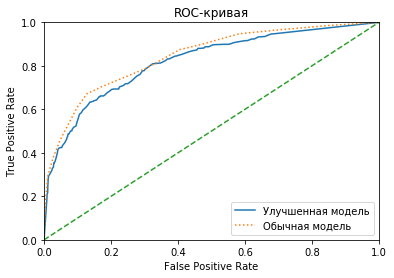

Площадь под кривой для идеальной модели: 0.8438044279565291


In [29]:
probabilities_valid = IdealTreeUpd.predict_proba(features_valid)

ROCCURVE_paint_Comp(IdealTreeUpd,IdealTree, features_valid, target_valid)

auc_roc=roc_auc_score(target_valid, probabilities_valid[:,1])

print('Площадь под кривой для идеальной модели:',auc_roc)

### Логистическая регрессия

Проверим работу логистической регресии на сбалансированной выборке

In [30]:
LRModel.fit(features_upsampled, target_upsampled)
prediction=LRModel.predict(features_valid)
print('Точность логистической регресии:',precision_score(target_valid, prediction))
print('Полнота логистической регрессии:',recall_score(target_valid, prediction))
print('F1 логистической регрессии:',f1_score(target_valid, prediction))

# сохраним параметры

LR_prec=round(precision_score(target_valid, prediction),3)
LR_recall=round(recall_score(target_valid, prediction),3)
LR_f1=round(f1_score(target_valid, prediction),3)
probabilities_valid = LRModel.predict_proba(features_valid)
auc_roc=roc_auc_score(target_valid, probabilities_valid[:,1])
LR_roc=round(roc_auc_score(target_valid, probabilities_valid[:,1]),3)

Точность логистической регресии: 0.3361188486536676
Полнота логистической регрессии: 0.6766355140186916
F1 логистической регрессии: 0.4491315136476427


ROC кривая логистической регрессии на сбалансированной выборке:

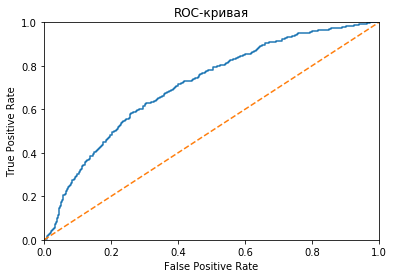

Площадь под кривой для модели: 0.711


In [31]:
ROCCURVE_paint_Standart(LRModel, features_valid, target_valid)

print('Площадь под кривой для модели:',LR_roc)

### Случайный лес RandomForestClassifier

In [32]:
IdealForest.fit(features_upsampled, target_upsampled)
prediction=IdealForest.predict(features_valid)

print('Точность леса:',precision_score(target_valid, prediction))
print('Полнота леса:',recall_score(target_valid, prediction))
print('F1 леса:',f1_score(target_valid, prediction))


IF_depth=round(IdealForest.max_depth,3)
IF_msl=round(IdealForest.min_samples_leaf,3)
IF_nest=round(IdealForest.n_estimators,3)
IF_prec=round(precision_score(target_valid, prediction),3)
IF_recall=round(recall_score(target_valid, prediction),3)
IF_f1=round(f1_score(target_valid, prediction),3)
probabilities_valid = IdealForest.predict_proba(features_valid)
IF_roc=round(roc_auc_score(target_valid, probabilities_valid[:,1]),3)

Точность леса: 0.6697459584295612
Полнота леса: 0.5420560747663551
F1 леса: 0.5991735537190083


In [33]:
IdealForestUpd=FindIdealRandomForest(IdealForest, f1_score(target_valid, IdealForest.predict(features_valid)), features_upsampled, target_upsampled,features_valid, target_valid,'balanced')            

print('Идеальная глубина', IdealForestUpd.max_depth)
print('Идеальное количество деревьев', IdealForestUpd.n_estimators)
print('Точность леса:',precision_score(target_valid, IdealForestUpd.predict(features_valid)))
print('Полнота леса:',recall_score(target_valid, IdealForestUpd.predict(features_valid)))
print('F1 леса:',f1_score(target_valid, IdealForestUpd.predict(features_valid)))

IFU_depth=round(IdealForestUpd.max_depth,3)
IFU_msl=round(IdealForestUpd.min_samples_leaf,3)
IFU_nest=round(IdealForestUpd.n_estimators,3)
IFU_prec=round(precision_score(target_valid, IdealForestUpd.predict(features_valid)),3)
IFU_recall=round(recall_score(target_valid, IdealForestUpd.predict(features_valid)),3)
IFU_f1=round(f1_score(target_valid, IdealForestUpd.predict(features_valid)),3)
probabilities_valid = IdealForestUpd.predict_proba(features_valid)
IFU_roc=round(roc_auc_score(target_valid, probabilities_valid[:,1]),3)

Идеальная глубина 9
Идеальное количество деревьев 118
Точность леса: 0.5560344827586207
Полнота леса: 0.7233644859813084
F1 леса: 0.628757108042242


Построим ROc кривую для улучшенной модели

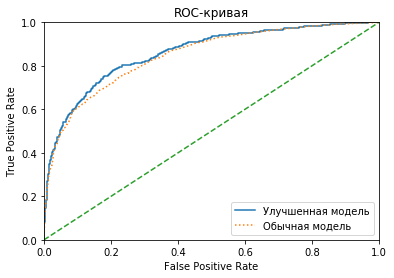

Площадь под кривой для идеальной модели: 0.86


In [34]:

ROCCURVE_paint_Comp(IdealForest, IdealForestUpd, features_valid, target_valid)

print('Площадь под кривой для идеальной модели:',IFU_roc)

### Устранение дисбаланса с помощью уменьшения выборки

Устраним дисбаланс с помощью уменьшения выборки

In [35]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.2)

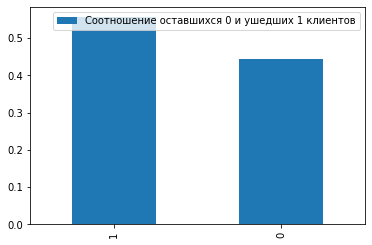

In [36]:
exit_frequency=target_downsampled.value_counts(normalize=True)
exit_frequency.plot(kind='bar', label='Соотношение оставшихся 0 и ушедших 1 клиентов', legend=True)

Проверим работу моделей при таком соотношении классов

#### Дерево решений DecisionTreeClassifier

In [37]:
IdealTree=IdealTreeUpd
IdealTree.fit(features_downsampled, target_downsampled)

prediction=IdealTree.predict(features_valid)
                            
print('Точность accuracy дерева решений:',accuracy_score(target_valid, prediction))
print('Точность дерева решений:',precision_score(target_valid, prediction))
print('Полнота дерева решений:',recall_score(target_valid, prediction))
print('F1 дерева решений:',f1_score(target_valid, prediction))

ITD_depth=round(IdealTree.max_depth,3)
ITD_msl=round(IdealTree.min_samples_leaf,3)
ITD_prec=round(precision_score(target_valid, prediction),3)
ITD_recall=round(recall_score(target_valid, prediction),3)
ITD_f1=round(f1_score(target_valid, prediction),3)
probabilities_valid = IdealTree.predict_proba(features_valid)
ITD_roc=round(roc_auc_score(target_valid, probabilities_valid[:,1]),3)


Точность accuracy дерева решений: 0.77
Точность дерева решений: 0.47596153846153844
Полнота дерева решений: 0.7401869158878505
F1 дерева решений: 0.5793708851499635


Попробуем подобрать гиперпараметры, чтобы улучшить метрики

In [38]:
IdealTreeUpd=FindIdealDecisionTree(IdealTree,f1_score(target_valid, prediction),features_downsampled, target_downsampled,features_valid, target_valid, 'balanced')

print('Идеальная глубина', IdealTreeUpd.max_depth)
print('Идеальное количество листьев', IdealTreeUpd.min_samples_leaf)

print('Точность дерева решений:',precision_score(target_valid, IdealTreeUpd.predict(features_valid)))
print('Полнота дерева решений:',recall_score(target_valid, IdealTreeUpd.predict(features_valid)))
print('F1 дерева решений:',f1_score(target_valid, IdealTreeUpd.predict(features_valid)))

ITUD_depth=round(IdealTreeUpd.max_depth,3)
ITUD_msl=round(IdealTreeUpd.min_samples_leaf,3)
ITUD_prec=round(precision_score(target_valid, IdealTreeUpd.predict(features_valid)),3)
ITUD_recall=round(recall_score(target_valid, IdealTreeUpd.predict(features_valid)),3)
ITUD_f1=round(f1_score(target_valid, IdealTreeUpd.predict(features_valid)),3)
probabilities_valid = IdealTreeUpd.predict_proba(features_valid)
ITUD_roc=round(roc_auc_score(target_valid, probabilities_valid[:,1]),3)


Идеальная глубина 7
Идеальное количество листьев 36
Точность дерева решений: 0.5076530612244898
Полнота дерева решений: 0.7439252336448599
F1 дерева решений: 0.6034874905231236


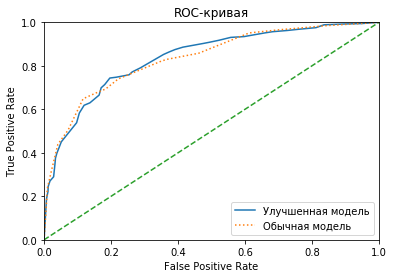

Площадь под кривой для идеальной модели: 0.838


In [39]:

ROCCURVE_paint_Comp(IdealTree, IdealTreeUpd, features_valid, target_valid)
print('Площадь под кривой для идеальной модели:',ITUD_roc)

#### Логистическая регрессия

Проверим работу логистической регрессии

In [51]:
LRModel.fit(features_downsampled, target_downsampled)
prediction=LRModel.predict(features_valid)

print('Точность логистической регресии:',precision_score(target_valid, prediction))
print('Полнота логистической регрессии:',recall_score(target_valid, prediction))
print('F1 логистической регрессии:',f1_score(target_valid, prediction))

LRD_prec=round(precision_score(target_valid, prediction),3)
LRD_recall=round(recall_score(target_valid, prediction),3)
LRD_f1=round(f1_score(target_valid, prediction),3)
probabilities_valid = LRModel.predict_proba(features_valid)
LRD_roc=round(roc_auc_score(target_valid, probabilities_valid[:,1]),3)

Точность логистической регресии: 0.3074074074074074
Полнота логистической регрессии: 0.7757009345794392
F1 логистической регрессии: 0.44031830238726793


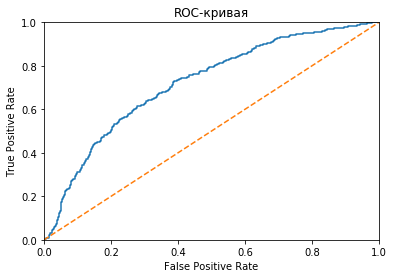

Площадь под кривой для логистической регрессии: 0.719


In [41]:
ROCCURVE_paint_Standart(LRModel, features_valid, target_valid)

print('Площадь под кривой для логистической регрессии:',LRD_roc)

#### Случайный лес

Проверим работу случайного леса

In [42]:
IdealForest=IdealForestUpd
IdealForest.fit(features_downsampled, target_downsampled)
prediction=IdealForest.predict(features_valid)

print('Точность леса:',precision_score(target_valid, prediction))
print('Полнота леса:',recall_score(target_valid, prediction))
print('F1 леса:',f1_score(target_valid, prediction))

IFD_depth=round(IdealForest.max_depth,3)
IFD_msl=round(IdealForest.min_samples_leaf,3)
IFD_nest=round(IdealForest.n_estimators,3)
IFD_prec=round(precision_score(target_valid, prediction),3)
IFD_recall=round(recall_score(target_valid, prediction),3)
IFD_f1=round(f1_score(target_valid, prediction),3)
probabilities_valid = IdealForest.predict_proba(features_valid)
IFD_roc=round(roc_auc_score(target_valid, probabilities_valid[:,1]),3)


Точность леса: 0.48484848484848486
Полнота леса: 0.7775700934579439
F1 леса: 0.5972720746590093


In [43]:
IdealForestUpd=FindIdealRandomForest(IdealForest, f1_score(target_valid, IdealForest.predict(features_valid)), features_downsampled, target_downsampled,features_valid, target_valid,'balanced')
            
print('Идеальная глубина', IdealForestUpd.max_depth)
print('Идеальное количество деревьев', IdealForestUpd.n_estimators)
print('Точность дерева решений:',precision_score(target_valid, IdealForestUpd.predict(features_valid)))
print('Полнота дерева решений:',recall_score(target_valid, IdealForestUpd.predict(features_valid)))
print('F1 дерева решений:',f1_score(target_valid, IdealForestUpd.predict(features_valid)))

IFUD_depth=round(IdealForestUpd.max_depth,3)
IFUD_msl=round(IdealForestUpd.min_samples_leaf,3)
IFUD_nest=round(IdealForestUpd.n_estimators,3)
IFUD_prec=round(precision_score(target_valid, IdealForestUpd.predict(features_valid)),3)
IFUD_recall=round(recall_score(target_valid, IdealForestUpd.predict(features_valid)),3)
IFUD_f1=round(f1_score(target_valid, IdealForestUpd.predict(features_valid)),3)
probabilities_valid = IdealForestUpd.predict_proba(features_valid)
IFUD_roc=round(roc_auc_score(target_valid, probabilities_valid[:,1]),3)


Идеальная глубина 8
Идеальное количество деревьев 118
Точность дерева решений: 0.49941792782305006
Полнота дерева решений: 0.8018691588785046
F1 дерева решений: 0.6154949784791965


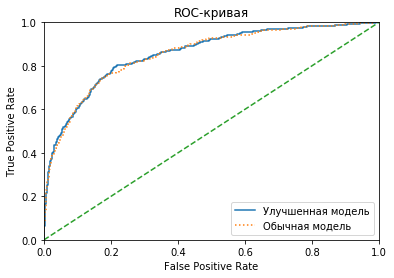

Площадь под кривой для идеальной модели: 0.857


In [44]:
ROCCURVE_paint_Comp(IdealForest,IdealForestUpd, features_valid, target_valid)


print('Площадь под кривой для идеальной модели:',IFUD_roc)

Выведем параметры обычных и улучшенных моделей в отдельную таблицу:

In [53]:
param_table=PrettyTable()
param_table.field_names = ["Алгоритм", "Выборка", "Глубина", "Листья", "Деревья","Точность", "Полнота","F1", "ROC-AUC"]
param_table.add_row(["Дерево решений", "upsampled",IT_depth,IT_msl,"X",IT_prec,IT_recall,IT_f1,IT_roc])
param_table.add_row(["Дерево решений улучшенное", "upsampled",ITU_depth,ITU_msl,"X",ITU_prec,ITU_recall,ITU_f1,ITU_roc])
param_table.add_row(["Логистическая регрессия", "upsampled","X","X","X",LR_prec,LR_recall,LR_f1,LR_roc])
param_table.add_row(["Случайный лес", "upsampled",IF_depth,IF_msl,IF_nest,IF_prec,IF_recall,IF_f1,IF_roc])
param_table.add_row(["Случайный лес улучшенный", "upsampled",IFU_depth,IFU_msl,IFU_nest,IFU_prec,IFU_recall,IFU_f1,IFU_roc])
param_table.add_row(["Дерево решений", "downsampled",ITD_depth,ITD_msl,"X",ITD_prec,ITD_recall,ITD_f1,ITD_roc])
param_table.add_row(["Дерево решений улучшенное", "downsampled",ITUD_depth,ITUD_msl,"X",ITUD_prec,ITUD_recall,ITUD_f1,ITUD_roc])
param_table.add_row(["Логистическая регрессия", "downsampled","X","X","X",LRD_prec,LRD_recall,LRD_f1,LRD_roc])
param_table.add_row(["Случайный лес", "downsampled",IFD_depth,IFD_msl,IFD_nest,IFD_prec,IFD_recall,IFD_f1,IFD_roc])
param_table.add_row(["Случайный лес улучшенный", "downsampled",IFUD_depth,IFUD_msl,IFUD_nest,IFUD_prec,IFUD_recall,IFUD_f1,IFUD_roc])

print(param_table)


+---------------------------+-------------+---------+--------+---------+----------+---------+-------+---------+
|          Алгоритм         |   Выборка   | Глубина | Листья | Деревья | Точность | Полнота |   F1  | ROC-AUC |
+---------------------------+-------------+---------+--------+---------+----------+---------+-------+---------+
|       Дерево решений      |  upsampled  |    11   |   31   |    X    |  0.449   |   0.71  |  0.55 |  0.821  |
| Дерево решений улучшенное |  upsampled  |    5    |   29   |    X    |   0.53   |  0.703  | 0.604 |  0.844  |
|  Логистическая регрессия  |  upsampled  |    X    |   X    |    X    |  0.336   |  0.677  | 0.449 |  0.711  |
|       Случайный лес       |  upsampled  |    23   |   1    |   113   |   0.67   |  0.542  | 0.599 |  0.848  |
|  Случайный лес улучшенный |  upsampled  |    9    |   1    |   118   |  0.556   |  0.723  | 0.629 |   0.86  |
|       Дерево решений      | downsampled |    5    |   29   |    X    |  0.476   |   0.74  | 0.579 |  0

### Вывод: 
После устранения дисбаланса и подбора параметров 2 модели показали нужный нам результат: F1 не ниже 0.59 и высокую полноту: дерево решений и cлучайный лес. У обоих алгоритмов примерно одинаковый показатель AUC-ROC(0.84-0.86), что позволяет говорить о высоком качестве моделей.

## Тестирование модели

Лучший результат показал алгоритм случайный лес и дерево решений. Проверим их на тестовой выборке

Преобразуем исходный датасет еще раз и создадим 3 выборки: обучающую, валидационную и тестовую

In [46]:
# скопируем исходный data frame  в новый
churn_test=churn.copy()

# удалим столбцы с фамилией и ID
churn_test=churn.drop(['CustomerId','Surname','RowNumber'],1)

# техникой OHE преобразуем столбец Gender

churn_test=pd.get_dummies(data=churn_test, columns=['Gender'], drop_first=True)

# прямым кодированием преобразуем столбец Geography 

churn_test.Geography=churn_test.Geography.fillna(0)


encoder.fit(churn_test[['Geography']])

churn_test['Geography']=pd.DataFrame(encoder.transform(churn_test[['Geography']]))

churn_test.head(5)

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male
0,619,0.0,42,2.0,0.00,1,1,1,101348.88,1,0
1,608,2.0,41,1.0,83807.86,1,0,1,112542.58,0,0
2,502,0.0,42,8.0,159660.80,3,1,0,113931.57,1,0
3,699,0.0,39,1.0,0.00,2,0,0,93826.63,0,0
4,850,2.0,43,2.0,125510.82,1,1,1,79084.10,0,0


In [47]:
features=churn_test.drop('Exited', axis=1)
target=churn_test['Exited']


In [48]:
pd.options.mode.chained_assignment = None

features = scaler.transform(features)

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=.3, random_state=12345)


In [49]:
IdealForestUpd.fit(features_train, target_train)
IdealTreeUpd.fit(features_train, target_train)


predictionF=IdealForestUpd.predict(features_test)
predictionT=IdealTreeUpd.predict(features_test)


print('Точность леса:',precision_score(target_test, predictionF))
print('Полнота леса:',recall_score(target_test, predictionF))
print('F1 леса:',f1_score(target_test, predictionF))
print('')
print('Точность дерева:',precision_score(target_test, predictionT))
print('Полнота дерева:',recall_score(target_test, predictionT))
print('F1 дерева:',f1_score(target_test, predictionT))

Точность леса: 0.564935064935065
Полнота леса: 0.694888178913738
F1 леса: 0.6232091690544413

Точность дерева: 0.4332129963898917
Полнота дерева: 0.7667731629392971
F1 дерева: 0.5536332179930795


Построим кривую и найдем показатель auc-roc

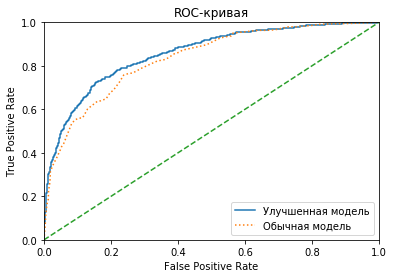

Площадь под кривой леса: 0.857
Площадь под кривой дерева решений: 0.857


In [50]:
ROCCURVE_paint_Comp(IdealTreeUpd,IdealForestUpd,features_test, target_test)

probabilities_validF = IdealForestUpd.predict_proba(features_test)
auc_rocF=roc_auc_score(target_test, probabilities_validF[:,1])

probabilities_validT = IdealTreeUpd.predict_proba(features_test)
auc_rocT=roc_auc_score(target_test, probabilities_validF[:,1])

print('Площадь под кривой леса:',round(auc_rocF,3))
print('Площадь под кривой дерева решений:',round(auc_rocT,3))

## Вывод: 
По результатам тестирований алгоритмы случайного леса и дерева решений показали лучшие результаты. Однако, цель была достигнуть F1 не менее 0.59. Данный результат на тестовой выборке показал только алгоритм случайного леса, который и можно выбрать в качестве наиболее подходящего для выполнения поставленной задачи.